# <span style="color:darkred">  Esercitazione 8 </span>

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters, $\sigma$, which is the width of the two Gaussians under square root, and $\mu$, which represents the distance from the origin of their average values.

### Exercise 08.1

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity.
______________________

Per il seguente esercizio, il codice eseguiva un totale di 1000000 passi, suddivisi in blocchi di 100 per l'analisi dell'errore.
Il campionamento della funzione d'onda viene eseguito con un accettazione del 50%.

Di seguito vengono mostrati alcuni risultati per verificare il funzionamento del codice nel calcolo del valor medio di H.
Per la funzione d'onda vengono utilizzati come parametri iniziali $\mu = 1$ e $\sigma = 0.5$.

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

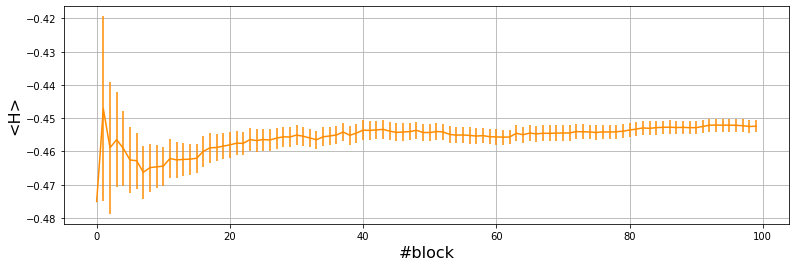

In [2]:
T = 1000000 #misure
M = 100 #blocchi
x = np.arange(M)


H, error = np.loadtxt("Es01\misureH.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(1, figsize=(13,4))
plt.errorbar(x, H, yerr=error, color='darkorange')
plt.xlabel('#block',fontsize= 16)
plt.ylabel('<H>', fontsize= 16)
plt.grid(True)

plt.show()

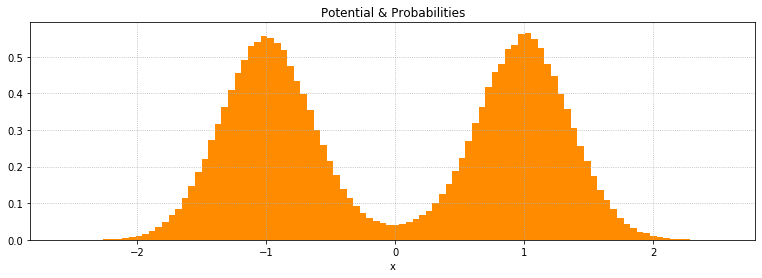

In [3]:
n_bins = 100
X = np.loadtxt("Es01\coordinateX.dat", usecols=(0), delimiter=' ', unpack='true')  



plt.figure(1, figsize=(13,4))
scale = 0.3
plt.hist(X,n_bins, density = True, facecolor='darkorange') #plot della probabilità misurata
plt.xlabel('x')
plt.title('Potential & Probabilities')
plt.grid(True, linestyle='dotted')
#plt.xlim((-3,3))
#plt.ylim((-0.6,0.6))
plt.show()
plt.show()

### Exercise 08.2

Use your Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

- As usual, show a picture of the estimation of $\langle {\hat H} \rangle_T$  and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture of the sampled $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation.

______________________________________________
Per ottimizzare i parametri della funzione d'onda ho implementato come ottimizzatore il simulatted annealing, partendo da una temperatura di beta = 5 e, ad ogni 100 parametri individuati, raffredando sommando un dB = 5 per 100 volte. 
Per la singola coppia di parametri viene calcolato un valore medio di H con 10000 step.

Per i parametri ho implementato una mossa MovePara(), la quale permetteva di variarli. Una osservazione da fare è che per la $\sigma$ è impostato un valore minimo di $\sigma_{min} = 0.1$ affinché non ci fossero problemi con il calcolo della funzione. (Errori dovuti al calcolo di 1/$\sigma^4$)

Dopo aver trovato i parametri ottimali, ho eseguito una misura di H medio con il metodo dell'analisi a blocchi. 

Al termine dell'ottimizzazione sono stati trovati i seguenti parametri:

  * $\mu = 0.795108$
  * $\sigma = 0.626162$
  
Di seguito sono mostrati i risultati per questi parametri.


In [4]:
##Calcolo valori teorici

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


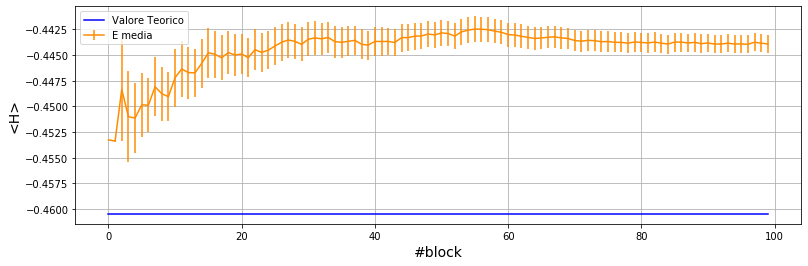

In [5]:
T = 1000000 #misure
M = 100 #blocchi
p = np.arange(M)

Etheo = np.zeros(len(p))
for i in range(len(p)):
    Etheo[i] = E[0]
    
H, error = np.loadtxt("Es02\misureEnergia.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(1, figsize=(13,4))
plt.errorbar(p, H, yerr=error, color='darkorange', label ='E media')
plt.plot(p,Etheo, color = 'blue', label = 'Valore Teorico')
plt.xlabel('#block',fontsize= 14)
plt.ylabel('<H>', fontsize= 14)
plt.legend()
plt.grid(True)

plt.show()

Dal grafico sopra si osserva che l'energia media per i parametri trovati converge ad un valore che è superiore all'energia attesa dalla teoria. Questo andamento era però atteso in quanto stiamo considerando una funzione d'onda non esatta per il sistema. 

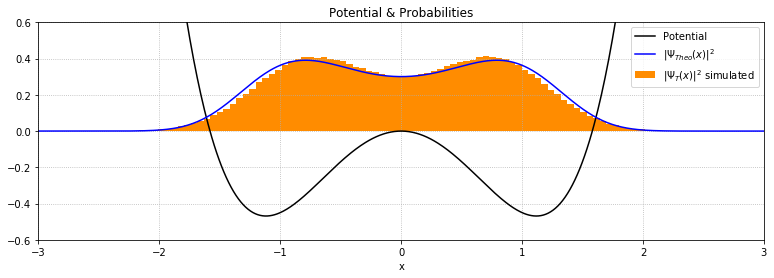

In [6]:
n_bins = 100
X = np.loadtxt("Es02\coordinateX.dat", usecols=(0), delimiter=' ', unpack='true')  



plt.figure(1, figsize=(13,4))
scale = 0.3
plt.hist(X,n_bins, density = True, facecolor='darkorange', label = "$|\Psi_T(x)|^2$ simulated") #plot della probabilità misurata
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, color = "blue", label = "$|\Psi_{Theo}(x)|^2$") #plot della probabilità teorica
plt.xlabel('x')
plt.title('Potential & Probabilities')
plt.grid(True, linestyle='dotted')
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

Dall'andamento delle probabilità risulta che comunque i parametri $\mu$ e $\sigma$ sono dei buoni parametri per approssimare il comportamento della $|\Psi_{Theo}(x)|^2$. Anche se il campionamento delle posizioni risulta essere molto buono, non è però sufficiente a garantire un esatto valore dell'Energia. 

### Exercise 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

#### Richiesta 1
Compare your results with those obtained with your VMC code. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?

#### Richiesta 2
Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.

_____________________________
##### Svolgimento 1

Riporto ora i risultati ottenuti utilizzando il codice con input **PIGS**. I risultati sono ottenuti andando a diminuire il parametro *imaginaryTimePropagation*, sia nel caso della funzione d'onda costante sia nel caso della funzione d'onda ottimizzata precedentemente.
La quale ricordo essere:
$$
\Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

con $\mu = 0.795108$ e $\sigma = 0.626162$

In [7]:
##carico caso funzione d'onda ottimizzata 
x_kin_8, kin_8, kin_err_8 = np.loadtxt("QMC_1D\kinetic_pigs_8.dat", usecols=(0,1,2), unpack='true')
x_pot_8, pot_8, pot_err_8 = np.loadtxt("QMC_1D\potential_pigs_8.dat", usecols=(0,1,2),  unpack='true')
x_prob_8, prob_8, prob_err_8 = np.loadtxt("QMC_1D\probability_pigs_8.dat", usecols=(0,1,2),  unpack='true')


x_kin_8_00, kin_8_00, kin_err_8_00 = np.loadtxt("QMC_1D\kinetic_pigs_8.00", usecols=(0,1,2), unpack='true')
x_pot_8_00, pot_8_00, pot_err_8_00 = np.loadtxt("QMC_1D\potential_pigs_8.00", usecols=(0,1,2),  unpack='true')
x_prob_8_00, prob_8_00, prob_err_8_00 = np.loadtxt("QMC_1D\probability_pigs_8.00", usecols=(0,1,2),  unpack='true')



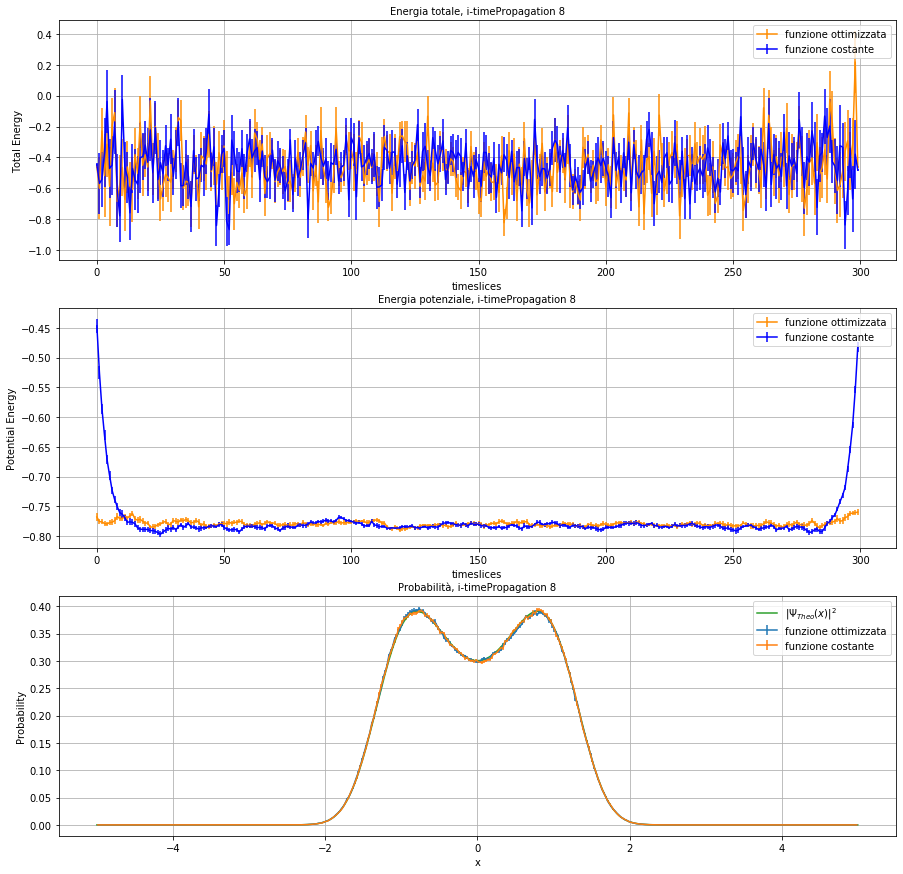

In [8]:
plt.figure(1,figsize=(15,15))
plt.subplot(311)
plt.errorbar(x_kin_8, kin_8 + pot_8, yerr=np.sqrt(kin_err_8*kin_err_8 + pot_err_8*pot_err_8), color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_kin_8, kin_8_00 + pot_8_00, yerr=np.sqrt(kin_err_8_00*kin_err_8_00 + pot_err_8_00*pot_err_8_00), color='blue', label ='funzione costante')
plt.title('Energia totale, i-timePropagation 8',fontsize= 10)
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Total Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(312)
plt.errorbar(x_pot_8, pot_8, yerr=pot_err_8, color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_pot_8_00,pot_8_00, yerr=pot_err_8_00, color='blue', label ='funzione costante')
plt.title('Energia potenziale, i-timePropagation 8',fontsize= 10)
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Potential Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(313)
plt.errorbar(x_prob_8, prob_8, yerr=prob_err_8, label ='funzione ottimizzata')
plt.errorbar(x_prob_8_00,prob_8_00, yerr=prob_err_8_00, label ='funzione costante')
plt.plot(x,(psi[0])**2, label = "$|\Psi_{Theo}(x)|^2$") #plot della probabilità teorica
plt.title('Probabilità, i-timePropagation 8',fontsize= 10)
plt.ylabel('Probability',fontsize= 10)
plt.xlabel('x',fontsize= 10)
plt.grid()
plt.legend()
plt.show()

I grafici sopra riportano i risultati rispetto ad una simulazione con imaginaryTimePropagation = 8. Quello che si osserva è che per entrambi le funzioni d'onda utilizzate, la probabilità coincide con la probabilità teorica del sistema. E l'energia totale in entrambi i casi oscilla intorno al valore atteso. 

La differenza fra le due funzioni d'onda utilizzate si osserva nel grafico dell'energia potenziale. Per quanto riguarda la funzione d'onda ottimizzata il valore dell'energia rimane costante lungo tutto le timeslices, questo significa che i valori $\mu$ e $\sigma$, precedentemente trovati, risultano essere dei parametri molto buoni per l'approssimazione considerata.

Di seguito riporto velocemente l'andamento per tempi di propagazione minori

In [9]:
##carico caso funzione d'onda ottimizzata 
##time 7
x_kin_7, kin_7, kin_err_7 = np.loadtxt("QMC_1D\kinetic_pigs_7.dat", usecols=(0,1,2), unpack='true')
x_pot_7, pot_7, pot_err_7 = np.loadtxt("QMC_1D\potential_pigs_7.dat", usecols=(0,1,2),  unpack='true')
x_prob_7, prob_7, prob_err_7 = np.loadtxt("QMC_1D\probability_pigs_7.dat", usecols=(0,1,2),  unpack='true')

x_kin_7_00, kin_7_00, kin_err_7_00 = np.loadtxt("QMC_1D\kinetic_pigs_7.00", usecols=(0,1,2), unpack='true')
x_pot_7_00, pot_7_00, pot_err_7_00 = np.loadtxt("QMC_1D\potential_pigs_7.00", usecols=(0,1,2),  unpack='true')
x_prob_7_00, prob_7_00, prob_err_7_00 = np.loadtxt("QMC_1D\probability_pigs_7.00", usecols=(0,1,2),  unpack='true')


##time 5
x_kin_5, kin_5, kin_err_5 = np.loadtxt("QMC_1D\kinetic_pigs_5.dat", usecols=(0,1,2), unpack='true')
x_pot_5, pot_5, pot_err_5 = np.loadtxt("QMC_1D\potential_pigs_5.dat", usecols=(0,1,2),  unpack='true')
x_prob_5, prob_5, prob_err_5 = np.loadtxt("QMC_1D\probability_pigs_5.dat", usecols=(0,1,2),  unpack='true')

x_kin_5_00, kin_5_00, kin_err_5_00 = np.loadtxt("QMC_1D\kinetic_pigs_5.00", usecols=(0,1,2), unpack='true')
x_pot_5_00, pot_5_00, pot_err_5_00 = np.loadtxt("QMC_1D\potential_pigs_5.00", usecols=(0,1,2),  unpack='true')
x_prob_5_00, prob_5_00, prob_err_5_00 = np.loadtxt("QMC_1D\probability_pigs_5.00", usecols=(0,1,2),  unpack='true')

#time3
x_kin_3, kin_3, kin_err_3 = np.loadtxt("QMC_1D\kinetic_pigs_3.dat", usecols=(0,1,2), unpack='true')
x_pot_3, pot_3, pot_err_3 = np.loadtxt("QMC_1D\potential_pigs_3.dat", usecols=(0,1,2),  unpack='true')
x_prob_3, prob_3, prob_err_3 = np.loadtxt("QMC_1D\probability_pigs_3.dat", usecols=(0,1,2),  unpack='true')

x_kin_3_00, kin_3_00, kin_err_3_00 = np.loadtxt("QMC_1D\kinetic_pigs_3.00", usecols=(0,1,2), unpack='true')
x_pot_3_00, pot_3_00, pot_err_3_00 = np.loadtxt("QMC_1D\potential_pigs_3.00", usecols=(0,1,2),  unpack='true')
x_prob_3_00, prob_3_00, prob_err_3_00 = np.loadtxt("QMC_1D\probability_pigs_3.00", usecols=(0,1,2),  unpack='true')

#time2
x_kin_2, kin_2, kin_err_2 = np.loadtxt("QMC_1D\kinetic_pigs_2.dat", usecols=(0,1,2), unpack='true')
x_pot_2, pot_2, pot_err_2 = np.loadtxt("QMC_1D\potential_pigs_2.dat", usecols=(0,1,2),  unpack='true')
x_prob_2, prob_2, prob_err_2 = np.loadtxt("QMC_1D\probability_pigs_2.dat", usecols=(0,1,2),  unpack='true')

x_kin_2_00, kin_2_00, kin_err_2_00 = np.loadtxt("QMC_1D\kinetic_pigs_2.00", usecols=(0,1,2), unpack='true')
x_pot_2_00, pot_2_00, pot_err_2_00 = np.loadtxt("QMC_1D\potential_pigs_2.00", usecols=(0,1,2),  unpack='true')
x_prob_2_00, prob_2_00, prob_err_2_00 = np.loadtxt("QMC_1D\probability_pigs_2.00", usecols=(0,1,2),  unpack='true')

#time1
x_kin_1, kin_1, kin_err_1 = np.loadtxt("QMC_1D\kinetic_pigs_1.dat", usecols=(0,1,2), unpack='true')
x_pot_1, pot_1, pot_err_1 = np.loadtxt("QMC_1D\potential_pigs_1.dat", usecols=(0,1,2),  unpack='true')
x_prob_1, prob_1, prob_err_1 = np.loadtxt("QMC_1D\probability_pigs_1.dat", usecols=(0,1,2),  unpack='true')

x_kin_1_00, kin_1_00, kin_err_1_00 = np.loadtxt("QMC_1D\kinetic_pigs_1.00", usecols=(0,1,2), unpack='true')
x_pot_1_00, pot_1_00, pot_err_1_00 = np.loadtxt("QMC_1D\potential_pigs_1.00", usecols=(0,1,2),  unpack='true')
x_prob_1_00, prob_1_00, prob_err_1_00 = np.loadtxt("QMC_1D\probability_pigs_1.00", usecols=(0,1,2),  unpack='true')


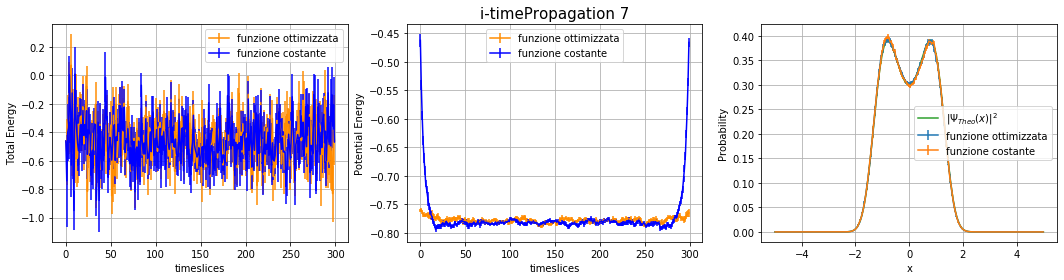

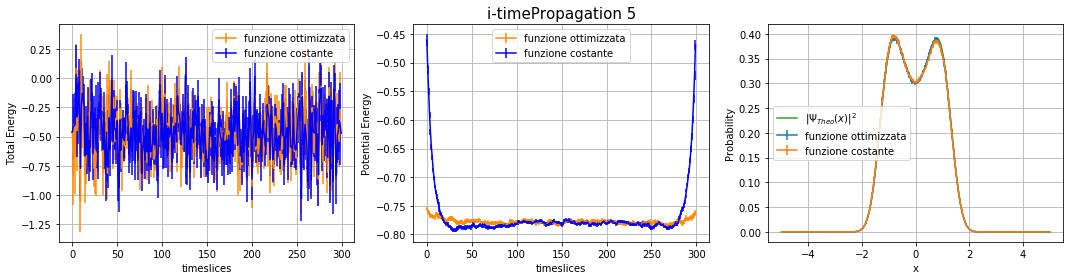

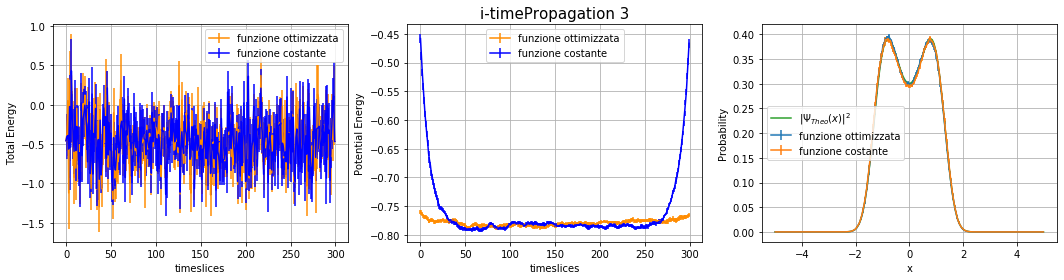

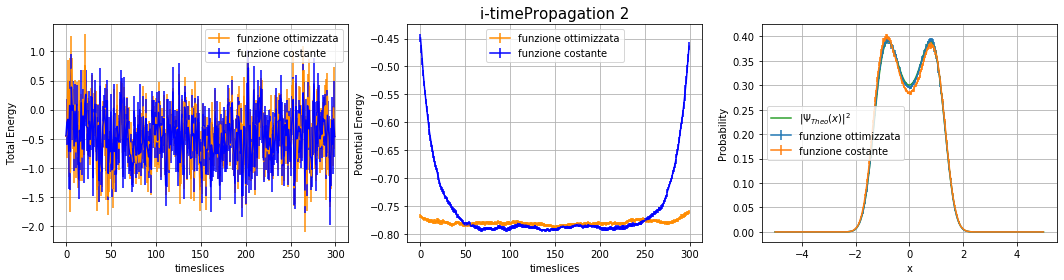

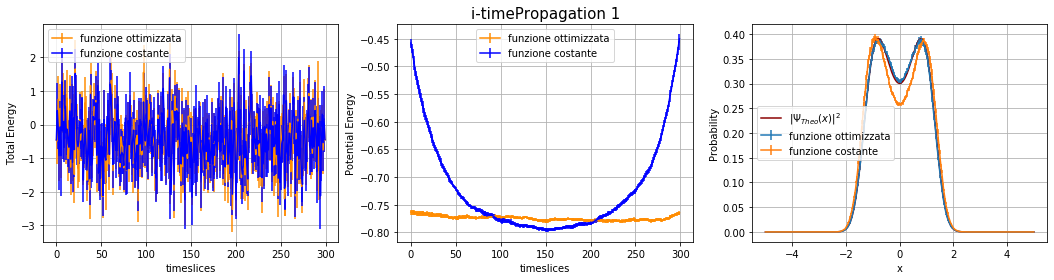

In [10]:
plt.figure(1,figsize=(18,4))
plt.subplot(131)
plt.errorbar(x_kin_7, kin_7 + pot_7, yerr=np.sqrt(kin_err_7*kin_err_7 + pot_err_7*pot_err_7), color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_kin_7, kin_7_00 + pot_7_00, yerr=np.sqrt(kin_err_7_00*kin_err_7_00 + pot_err_7_00*pot_err_7_00), color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Total Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('i-timePropagation 7',fontsize= 15)
plt.errorbar(x_pot_7, pot_7, yerr=pot_err_7, color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_pot_7_00,pot_7_00, yerr=pot_err_7_00, color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Potential Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(133)
plt.errorbar(x_prob_7, prob_7, yerr=prob_err_7, label ='funzione ottimizzata')
plt.errorbar(x_prob_7_00,prob_7_00, yerr=prob_err_7_00, label ='funzione costante')
plt.plot(x,(psi[0])**2, label = "$|\Psi_{Theo}(x)|^2$") #plot della probabilità teorica
plt.ylabel('Probability',fontsize= 10)
plt.xlabel('x',fontsize= 10)
plt.grid()
plt.legend()
plt.show()

plt.figure(2,figsize=(18,4))
plt.subplot(131)
plt.errorbar(x_kin_5, kin_5 + pot_5, yerr=np.sqrt(kin_err_5*kin_err_5 + pot_err_5*pot_err_5), color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_kin_5, kin_5_00 + pot_5_00, yerr=np.sqrt(kin_err_5_00*kin_err_5_00 + pot_err_5_00*pot_err_5_00), color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Total Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('i-timePropagation 5',fontsize= 15)
plt.errorbar(x_pot_5, pot_5, yerr=pot_err_5, color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_pot_5_00,pot_5_00, yerr=pot_err_5_00, color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Potential Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(133)
plt.errorbar(x_prob_5, prob_5, yerr=prob_err_5, label ='funzione ottimizzata')
plt.errorbar(x_prob_5_00,prob_5_00, yerr=prob_err_5_00, label ='funzione costante')
plt.plot(x,(psi[0])**2, label = "$|\Psi_{Theo}(x)|^2$") #plot della probabilità teorica
plt.ylabel('Probability',fontsize= 10)
plt.xlabel('x',fontsize= 10)
plt.grid()
plt.legend()
plt.show()

plt.figure(3,figsize=(18,4))
plt.subplot(131)
plt.errorbar(x_kin_3, kin_3 + pot_3, yerr=np.sqrt(kin_err_3*kin_err_3 + pot_err_3*pot_err_3), color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_kin_3, kin_3_00 + pot_3_00, yerr=np.sqrt(kin_err_3_00*kin_err_3_00 + pot_err_3_00*pot_err_3_00), color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Total Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('i-timePropagation 3',fontsize= 15)
plt.errorbar(x_pot_3, pot_3, yerr=pot_err_3, color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_pot_3_00,pot_3_00, yerr=pot_err_3_00, color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Potential Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(133)
plt.errorbar(x_prob_3, prob_3, yerr=prob_err_3, label ='funzione ottimizzata')
plt.errorbar(x_prob_3_00,prob_3_00, yerr=prob_err_3_00, label ='funzione costante')
plt.plot(x,(psi[0])**2, label = "$|\Psi_{Theo}(x)|^2$") #plot della probabilità teorica
plt.ylabel('Probability',fontsize= 10)
plt.xlabel('x',fontsize= 10)
plt.grid()
plt.legend()
plt.show()

plt.figure(4,figsize=(18,4))
plt.subplot(131)
plt.errorbar(x_kin_2, kin_2 + pot_2, yerr=np.sqrt(kin_err_2*kin_err_2 + pot_err_2*pot_err_2), color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_kin_2, kin_2_00 + pot_2_00, yerr=np.sqrt(kin_err_2_00*kin_err_2_00 + pot_err_2_00*pot_err_2_00), color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Total Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('i-timePropagation 2',fontsize= 15)
plt.errorbar(x_pot_2, pot_2, yerr=pot_err_2, color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_pot_2_00,pot_2_00, yerr=pot_err_2_00, color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Potential Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(133)
plt.errorbar(x_prob_2, prob_2, yerr=prob_err_2, label ='funzione ottimizzata')
plt.errorbar(x_prob_2_00,prob_2_00, yerr=prob_err_2_00, label ='funzione costante')
plt.plot(x,(psi[0])**2, label = "$|\Psi_{Theo}(x)|^2$") #plot della probabilità teorica
plt.ylabel('Probability',fontsize= 10)
plt.xlabel('x',fontsize= 10)
plt.grid()
plt.legend()
plt.show()

plt.figure(5,figsize=(18,4))
plt.subplot(131)
plt.errorbar(x_kin_1, kin_1 + pot_1, yerr=np.sqrt(kin_err_1*kin_err_1 + pot_err_1*pot_err_1), color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_kin_1, kin_1_00 + pot_1_00, yerr=np.sqrt(kin_err_1_00*kin_err_1_00 + pot_err_1_00*pot_err_1_00), color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Total Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('i-timePropagation 1',fontsize= 15)
plt.errorbar(x_pot_1, pot_1, yerr=pot_err_1, color='darkorange', label ='funzione ottimizzata')
plt.errorbar(x_pot_1_00,pot_1_00, yerr=pot_err_1_00, color='blue', label ='funzione costante')
plt.xlabel('timeslices',fontsize= 10)
plt.ylabel('Potential Energy',fontsize= 10)
plt.grid()
plt.legend()

plt.subplot(133)
plt.errorbar(x_prob_1, prob_1, yerr=prob_err_1, label ='funzione ottimizzata')
plt.errorbar(x_prob_1_00,prob_1_00, yerr=prob_err_1_00, label ='funzione costante')
plt.plot(x,(psi[0])**2, label = "$|\Psi_{Theo}(x)|^2$", color = 'darkred') #plot della probabilità teorica
plt.ylabel('Probability',fontsize= 10)
plt.xlabel('x',fontsize= 10)
plt.grid()
plt.legend()
plt.show()

Dal andamendo dei grafici si osserva che fino ad un imaginaryTimePropagation = 3 la funzione d'onda costante riesce a proiettarsi nel ground state esatto. 

La funzione d'onda ottimizzata invece riesce a raggiungere un imaginaryTimePropagation = 1. A questi tempi però è maggiore l'oscillazione dell'energia totale. 

_____________________________
##### Svolgimento 2
Riporto ora in un grafico il confronto dell'andamento della probabilità della funzione d'onda ottimizzata a diverse temperature. Per queste simulazioni è stato posto un imaginaryTimePropagation = 8.

In [11]:
x_prob_1_25, prob_1_25, prob_err_1_25 = np.loadtxt("QMC_1D\probability_picm_1_25.dat", usecols=(0,1,2),  unpack='true')
x_prob_1_5, prob_1_5, prob_err_1_5 = np.loadtxt("QMC_1D\probability_picm_1_5.dat", usecols=(0,1,2),  unpack='true')
x_prob_2, prob_2, prob_err_2 = np.loadtxt("QMC_1D\probability_picm_2.dat", usecols=(0,1,2),  unpack='true')
x_prob_2_5, prob_2_5, prob_err_2_5 = np.loadtxt("QMC_1D\probability_picm_2_5.dat", usecols=(0,1,2),  unpack='true')
x_prob_5, prob_5, prob_err_5 = np.loadtxt("QMC_1D\probability_picm_5.dat", usecols=(0,1,2),  unpack='true')

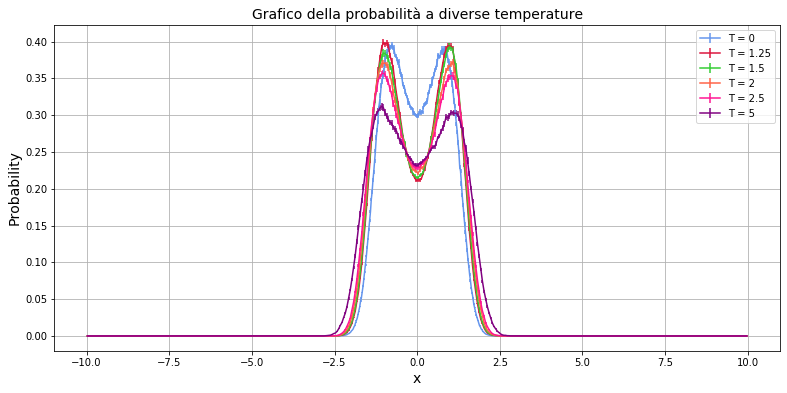

In [12]:
plt.figure(1,figsize=(13,6))
plt.errorbar(x_prob_8, prob_8, yerr=prob_err_8, color = 'cornflowerblue' ,label ='T = 0')
plt.errorbar(x_prob_1_25, prob_1_25, yerr=prob_err_1_25, color = 'crimson',label ='T = 1.25')
plt.errorbar(x_prob_1_5, prob_1_5, yerr=prob_err_1_5, color = 'limegreen', label ='T = 1.5')
plt.errorbar(x_prob_2, prob_2, yerr=prob_err_2, color = 'tomato', label ='T = 2')
plt.errorbar(x_prob_2_5, prob_2_5, yerr=prob_err_2_5, color = 'deeppink', label ='T = 2.5')
plt.errorbar(x_prob_5, prob_5, yerr=prob_err_5, color = 'purple', label ='T = 5')
plt.title('Grafico della probabilità a diverse temperature',fontsize= 14)
plt.ylabel('Probability',fontsize= 14)
plt.xlabel('x',fontsize= 14)
plt.grid()
plt.legend()
plt.show()

Dal grafico si osserva come all'aumentare della temperatura si manifesta un abbassamento dei picchi con corrispettivo allargamento della sigma. Questo perché all'aumentare della temperatura si iniziano a popolare anche gli stati eccitati, non popolati a temperatura nulla.